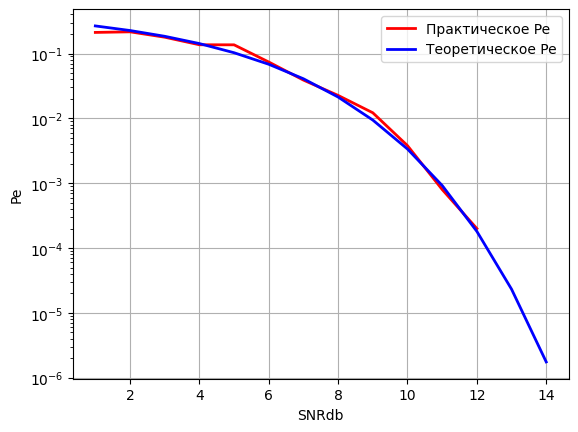

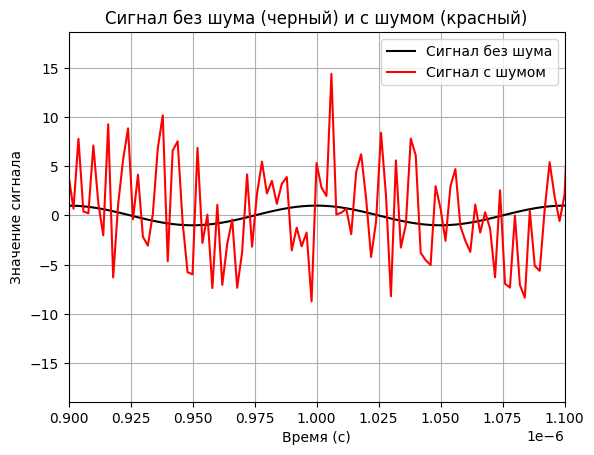

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q = 2
T = 5e-6
f0 = 10e6
dtf = 1 / T
Ns = 50
A = 1
dt = 1 / (Ns * f0)
t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :]) ** 2
max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 5000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

for ns in range(len(SNRdb)):
    SNR = 10 ** (SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr = 0
    Ntest = 0
    Pe_t = 0
    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1) ** (l + 1) * 1 / (1 + l) * np.exp(-l / (l + 1) * E / N0)
    last_test = Ntest
    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        r = np.cos(2 * np.pi * f[i] * t + 2 * np.pi * np.random.rand()) + sigma * np.random.randn(len(t))
        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)
        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j] ** 2) + (rsi[j] ** 2)
        max_value = np.max(ni)
        index_max = np.argmax(ni)
        if index_max != i:
            Nerr += 1
        Ntest += 1
        if Ntest - last_test > num_tests:
            break
    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, s[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10 ** -6, 1.1 * 10 ** -6])
plt.grid(True)
plt.show()
